<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

In [261]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

%matplotlib inline

<h4>Data overview (obtained from Kaggle)</h4>

<i>Data was gathered from participants in experimental speed dating events from 2002-2004. During the events, the attendees would have a four minute "first date" with every other participant of the opposite sex. At the end of their four minutes, participants were asked if they would like to see their date again. They were also asked to rate their date on six attributes: Attractiveness, Sincerity, Intelligence, Fun, Ambition, and Shared Interests.

The dataset also includes questionnaire data gathered from participants at different points in the process. These fields include: demographics, dating habits, self-perception across key attributes, beliefs on what others find valuable in a mate, and lifestyle information.</i>

<h5>Business questions</h5>
    
- Q1: What attributes increases the chance of someone finding a match at the event?
- Q2: How can the participants be grouped to find a potential match?

In [326]:
#Load the data
df = pd.read_csv('../data/Speed Dating Data.csv', encoding = "ISO-8859-1")

In [335]:
#Remove empty columns
df = df.dropna(how='all', axis=1)

#Drop unnessary columns
df = df.drop(df.filter(regex='has_null').columns, axis=1)
df = df.drop(df.filter(regex='2_1').columns, axis=1)
df = df.drop(df.filter(regex='3_1').columns, axis=1)
df = df.drop(df.filter(regex='5_1').columns, axis=1)

df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,Match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,Goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,Attractive,Sincere,Intelligent,Fun,Ambitious,SharedInterest,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9.0,8.0,7.0,7.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,1,7.0,6.0,8.0,7.0,6.0,8.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [328]:
# More filtering
newData = df.filter(['id', 'gender', 'match', 'age_o', 'race_o', 'field','undergrd','imprace', 'imprelig', 'from','zipcode','income', 'goal', 'career', 'exhappy', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1'])

<h4>Below are the attributes are people looking when dating:</h4>

100 points were distributed among the following attributes 

attr1_1 = Attractive

sinc1_1 = Sincere

intel1_1 = Intelligent

fun1_1 = Fun

amb1_1 = Ambitious

shar1_1 = Has shared interests/hobbies

In [329]:
#Creating new data frame with relevant columns for the analysis

#rename columns
df = df.rename(columns={'match': 'Match','attr1_1': 'Attractive','sinc1_1': 'Sincere', 'intel1_1':'Intelligent', 'amb1_1':'Ambitious', 'shar1_1':'SharedInterest', 'fun1_1':'Fun', 'goal':'Goal'})

#new data set with required columns
lookforData = df.filter(['Match','Attractive', 'Sincere', 'Intelligent', 'Fun', 'Ambitious', 'SharedInterest', 'Goal'])

lookforData.head()

,Match,Attractive,Sincere,Intelligent,Fun,Ambitious,SharedInterest,Goal
0,0,15.0,20.0,20.0,15.0,15.0,15.0,2.0
1,0,15.0,20.0,20.0,15.0,15.0,15.0,2.0
2,1,15.0,20.0,20.0,15.0,15.0,15.0,2.0
3,1,15.0,20.0,20.0,15.0,15.0,15.0,2.0
4,1,15.0,20.0,20.0,15.0,15.0,15.0,2.0


In [330]:
#Create two data frames to compare data with participants who found a match and participants who hasn't found a match. 
matchedData = lookforData.loc[lookforData.Match == 1]
unmatchedData = lookforData.loc[lookforData.Match == 0]

#Find the number of matches
print('**Percentages**\n\rFound someone: ' + str(round(matchedData.Match.size / newData.match.size * 100)) + '%')
print(' Found no one: ' + str(round(unmatchedData.Match.size / newData.match.size * 100)) + '%')

**Percentages**
Found someone: 16%
 Found no one: 84%


The above concludes that less than 20% of participants found a match

In [331]:
#described people who found a match during the event
matchedData.describe()

,Match,Attractive,Sincere,Intelligent,Fun,Ambitious,SharedInterest,Goal
count,1380.0,1365.00000,1365.000000,1365.000000,1363.000000,1360.000000,1360.000000,1365.000000
mean,1.0,22.93874,16.883026,20.480967,18.028371,10.621154,11.152882,2.089377
std,0.0,13.83699,7.078063,6.735570,6.400820,6.170268,6.434088,1.389396
min,1.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.0,15.00000,14.000000,18.000000,15.000000,5.000000,5.000000,1.000000
50%,1.0,20.00000,18.000000,20.000000,19.230000,10.000000,10.000000,2.000000
75%,1.0,25.00000,20.000000,25.000000,20.000000,15.000000,15.000000,2.000000
max,1.0,100.00000,60.000000,50.000000,50.000000,53.000000,30.000000,6.000000


In [332]:
#described people who found no match during the event
unmatchedData.describe()

,Match,Attractive,Sincere,Intelligent,Fun,Ambitious,SharedInterest,Goal
count,6998.0,6934.000000,6934.000000,6934.000000,6926.000000,6919.000000,6897.000000,6934.000000
mean,0.0,22.431144,17.497447,20.223219,17.344609,10.694605,11.981609,2.128497
std,0.0,12.326194,7.036611,6.791980,6.015281,6.116305,6.339427,1.410665
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.0,15.000000,15.000000,17.310000,15.000000,5.000000,10.000000,1.000000
50%,0.0,20.000000,18.750000,20.000000,18.000000,10.000000,11.540000,2.000000
75%,0.0,25.000000,20.000000,23.260000,20.000000,15.000000,16.000000,2.000000
max,0.0,100.000000,60.000000,50.000000,50.000000,53.000000,30.000000,6.000000


<h4>Scale for 'Goal' column. This indicates what the participants are trying to gain from the event.</h4>

- 1 = Seemed like a fun night out
- 2 = To meet new people
- 3 = To get a date
- 4 = Looking for a serious relationship
- 5 = To say I did it
- 6 = Other

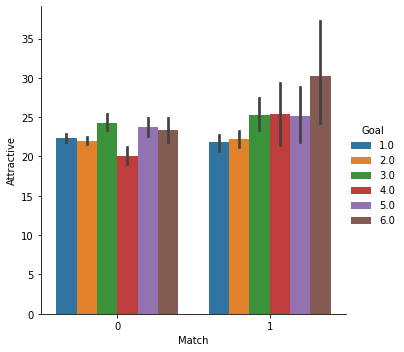

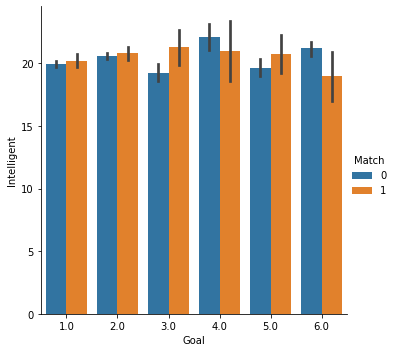

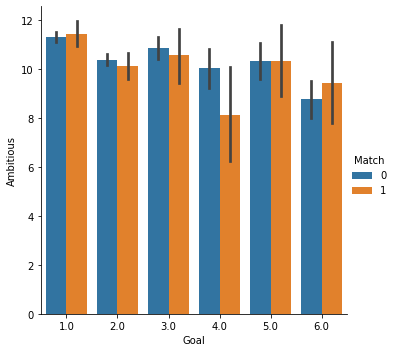

In [337]:
#this means that the people that haven't met their match
unmatchedData.Goal.value_counts()

sns.catplot(x="Match", y="Attractive", hue="Goal", kind="bar", data=lookforData)
sns.catplot(x="Goal", y="Intelligent", hue="Match", kind="bar", data=lookforData)
sns.catplot(x="Goal", y="Ambitious", hue="Match", kind="bar", data=lookforData)

In [276]:
#describe as a whole
lookforData.describe()

,Match,Attractive,Sincere,Intelligent,Fun,Ambitious,Goal
count,8378.000000,8299.000000,8299.000000,8299.000000,8289.000000,8279.000000,8299.000000
mean,0.164717,22.514632,17.396389,20.265613,17.457043,10.682539,2.122063
std,0.370947,12.587674,7.046700,6.783003,6.085239,6.124888,1.407181
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,15.000000,15.000000,17.390000,15.000000,5.000000,1.000000
50%,0.000000,20.000000,18.180000,20.000000,18.000000,10.000000,2.000000
75%,0.000000,25.000000,20.000000,23.810000,20.000000,15.000000,2.000000
max,1.000000,100.000000,60.000000,50.000000,50.000000,53.000000,6.000000


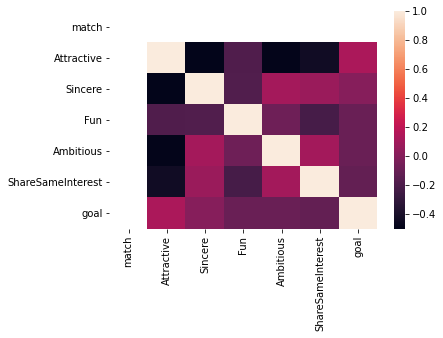

In [277]:
sns.heatmap(matchedData.corr())

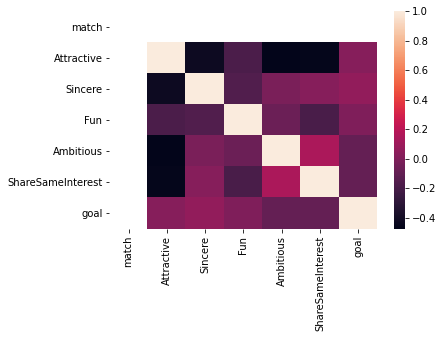

In [279]:
sns.heatmap(unmatchedData.corr())

In [12]:
# Finding out age majority
df.age.value_counts()

27.0    1059
23.0     894
26.0     869
24.0     863
25.0     837
28.0     746
22.0     655
29.0     589
30.0     574
21.0     291
32.0     210
33.0     161
34.0     152
31.0     125
35.0      60
20.0      55
36.0      45
19.0      20
42.0      20
38.0      19
39.0      18
18.0      10
55.0       6
37.0       5
Name: age, dtype: int64

In [103]:
# Finding out their work background
df.field.value_counts()

business                 631
law                      604
mba                      468
social work              414
international affairs    287
                        ... 
stats                      6
mfa  poetry                6
math of finance            6
theory                     5
marine geophysics          5
Name: field, Length: 219, dtype: int64